# Visual Story Telling: Green Buildings

The file greenbuildings.csv contains data on 7,894 commercial rental properties from across the United States. Of these, 685 properties have been awarded either LEED or EnergyStar certification as a green building. You can easily find out more about these rating systems on the web, e.g. at www.usgbc.org. The basic idea is that a commercial property can receive a green certification if its energy efficiency, carbon footprint, site selection, and building materials meet certain environmental benchmarks, as certified by outside engineers.

A group of real estate economists constructed the data in the following way. Of the 1,360 green-certified buildings listed as of December 2007 on the LEED or EnergyStar websites, current information about building characteristics and monthly rents were available for 685 of them. In order to provide a control population, each of these 685 buildings was matched to a cluster of nearby commercial buildings in the CoStar database. Each small cluster contains one green-certified building, and all non-rated buildings within a quarter-mile radius of the certified building. On average, each of the 685 clusters contains roughly 12 buildings, for a total of 7,894 data points.

The case
Over the past decade, both investors and the general public have paid increasingly close attention to the benefits of environmentally conscious buildings. There are both ethical and economic forces at work here. In commercial real estate, issues of eco-friendliness are intimately tied up with ordinary decisions about how to allocate capital. In this context, the decision to invest in eco-friendly buildings could pay off in at least four ways.

1. Every building has the obvious list of recurring costs: water, climate control, lighting, waste disposal, and so forth. Almost by definition, these costs are lower in green buildings.
2. Green buildings are often associated with better indoor environments—the kind that are full of sunlight, natural materials, and various other humane touches. Such environments, in turn, might result in higher employee productivity and lower absenteeism, and might therefore be more coveted by potential tenants. The financial impact of this factor, however, is rather hard to quantify ex ante; you cannot simply ask an engineer in the same way that you could ask a question such as, “How much are these solar panels likely to save on the power bill?”
3. Green buildings make for good PR. They send a signal about social responsibility and ecological awareness, and might therefore command a premium from potential tenants who want their customers to associate them with these values. It is widely believed that a good corporate image may enable a firm to charge premium prices, to hire better talent, and to attract socially conscious investors.
4. Finally, sustainable buildings might have longer economically valuable lives. For one thing, they are expected to last longer, in a direct physical sense. (One of the core concepts of the green-building movement is “life-cycle analysis,” which accounts for the high front-end environmental impact of ac- quiring materials and constructing a new building in the first place.) Moreover, green buildings may also be less susceptible to market risk—in particular, the risk that energy prices will spike, driving away tenants into the arms of bolder, greener investors.

Of course, much of this is mere conjecture. At the end of the day, tenants may or may not be willing to pay a premium for rental space in green buildings. We can only find out by carefully examining data on the commercial real-estate market.

The file greenbuildings.csv contains data on 7,894 commercial rental properties from across the United States. Of these, 685 properties have been awarded either LEED or EnergyStar certification as a green building. You can easily find out more about these rating systems on the web, e.g. at www.usgbc.org. The basic idea is that a commercial property can receive a green certification if its energy efficiency, carbon footprint, site selection, and building materials meet certain environmental benchmarks, as certified by outside engineers.

A group of real estate economists constructed the data in the following way. Of the 1,360 green-certified buildings listed as of December 2007 on the LEED or EnergyStar websites, current information about building characteristics and monthly rents were available for 685 of them. In order to provide a control population, each of these 685 buildings was matched to a cluster of nearby commercial buildings in the CoStar database. Each small cluster contains one green-certified building, and all non-rated buildings within a quarter-mile radius of the certified building. On average, each of the 685 clusters contains roughly 12 buildings, for a total of 7,894 data points.

The columns of the data set are coded as follows:

- CS.PropertyID: the building's unique identifier in the CoStar database.
cluster: an identifier for the building cluster, with each cluster containing one green-certified building and at least one other non-green-certified building within a quarter-mile radius of the cluster center.
- size: the total square footage of available rental space in the building.
- empl.gr: the year-on-year growth rate in employment in the building's geographic region.
- Rent: the rent charged to tenants in the building, in dollars per square foot per calendar year.
- leasing.rate: a measure of occupancy; the fraction of the building's available space currently under lease.
- stories: the height of the building in stories.
- age: the age of the building in years.
- renovated: whether the building has undergone substantial renovations during its lifetime.
- class.a, class.b: indicators for two classes of building quality (the third is Class C). These are relative classifications within a specific market. Class A buildings are generally the highest-quality properties in a given market. Class B buildings are a notch down, but still of reasonable quality. Class C buildings are the least desirable properties in a given market.
- green.rating: an indicator for whether the building is either LEED- or EnergyStar-certified.
- LEED, Energystar: indicators for the two specific kinds of green certifications.
- net: an indicator as to whether the rent is quoted on a "net contract" basis. Tenants with net-rental contracts pay their own utility costs, which are otherwise included in the quoted rental price.
- amenities: an indicator of whether at least one of the following amenities is available on-site: bank, convenience store, dry cleaner, restaurant, retail shops, fitness center.
- cd.total.07: number of cooling degree days in the building's region in 2007. A degree day is a measure of demand for energy; higher values mean greater demand. Cooling degree days are measured relative to a baseline outdoor temperature, below which a building needs no cooling.
- hd.total07: number of heating degree days in the building's region in 2007. Heating degree days are also measured relative to a baseline outdoor temperature, above which a building needs no heating.
- total.dd.07: the total number of degree days (either heating or cooling) in the building's region in 2007.
- Precipitation: annual precipitation in inches in the building's geographic region.
- Gas.Costs: a measure of how much natural gas costs in the building's geographic region.
- Electricity.Costs: a measure of how much electricity costs in the building's geographic region.
- cluster.rent: a measure of average rent per square-foot per calendar year in the building's local market.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns

# Special packages
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# Load the dataset
gb = pd.read_csv('greenbuildings.csv')
gb.head(3)

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,class_b,LEED,Energystar,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,0,0,1,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


To be consistent with the gurus, we created the dataframe that only includes properties with leasing rate greater than 10%.

In [4]:
# Data Cleaning - Remove buildings with low occupancy rates (<10%)
gb_clean = gb[gb['leasing_rate'] >= 0.1]
gb_clean

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,class_b,LEED,Energystar,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,0,0,1,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,1,0,0,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,0,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,0,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,0,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,0,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,1,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


##  Validation of Guru's Conjecture

In [5]:
# Rent Comparison - Calculate the median rent for green and non-green buildings
gb_clean.groupby('green_rating')[['Rent']].median()

,Rent
green_rating,
0,25.0
1,27.6


As can be seen above, there is a $2.6 difference in green and non-green buildings. We control for occupancy rates >10%. The results align with the guru's point. Then, we visulized the distribution of rent using boxplot.

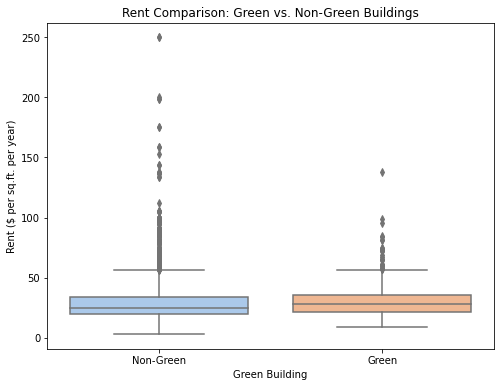

In [6]:
# Rent Comparison - Visualize the rent for green and non-green buildings
plt.figure(figsize=(8, 6))
sns.boxplot(data=gb_clean, x='green_rating', y='Rent', palette='pastel')
plt.xlabel('Green Building')
plt.ylabel('Rent ($ per sq.ft. per year)')
plt.title('Rent Comparison: Green vs. Non-Green Buildings')
plt.xticks([0, 1], ['Non-Green', 'Green'])
plt.show()

Non-green buildings have more outliers compared to green ones, so the guru's rationale for using the median instead of the mean makes sense.

However, we will still perform a multivariate linear regression to get a better understanding of the relationships, then we can drill down.

In [7]:
y, X = dmatrices('Rent ~ cluster + size + empl_gr + leasing_rate + stories + age + renovated + class_a + class_b + LEED + Energystar + green_rating + net + amenities + cd_total_07 + hd_total07 + Precipitation + Gas_Costs + Electricity_Costs + cluster_rent',
                 data=gb_clean, return_type='dataframe')

model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     598.9
Date:                Sun, 30 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:38:58   Log-Likelihood:                -28073.
No. Observations:                7661   AIC:                         5.619e+04
Df Residuals:                    7640   BIC:                         5.633e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.9932      1.07

Interestingly, we see here that whether a building is either LEED or EnergyStar certified is not a statistically significant predictor. Indicating that we should further explore the relationship between rent and other factors.

## Exploratory Analysis

### Class of the Building

The guru took the medians between the green buildings and non green buildings. But he didn't take class of the building into consideration. This factor may affect the price of the rent.

C:\Users\ARSENE~1\AppData\Local\Temp/ipykernel_8596/1349778469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_clean['class'] = np.where(gb_clean['class_a'] == 1, 'Class A', np.where(


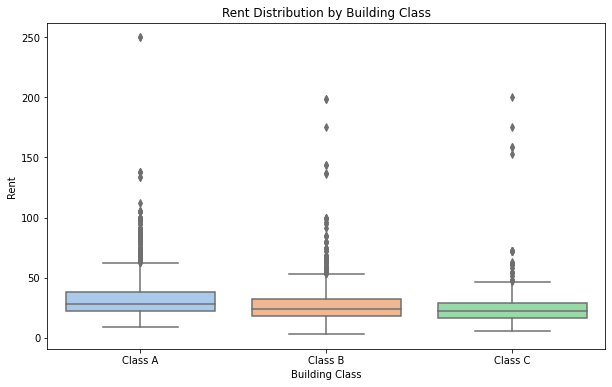

In [8]:
# Create a new column class
gb_clean['class'] = np.where(gb_clean['class_a'] == 1, 'Class A', np.where(
    gb_clean['class_b'] == 1, 'Class B', 'Class C'))

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Rent', data=gb_clean, palette='pastel')
plt.xlabel('Building Class')
plt.ylabel('Rent')
plt.title('Rent Distribution by Building Class')
plt.show()

From the boxplot we can see that the rent in different classes. Class A has the highest rent and Class C has the lowest rent.
We can conclude that the rent of the building is related with the building quality.

We can further explore the premiums for green and non-green buildings change when class is kept constant

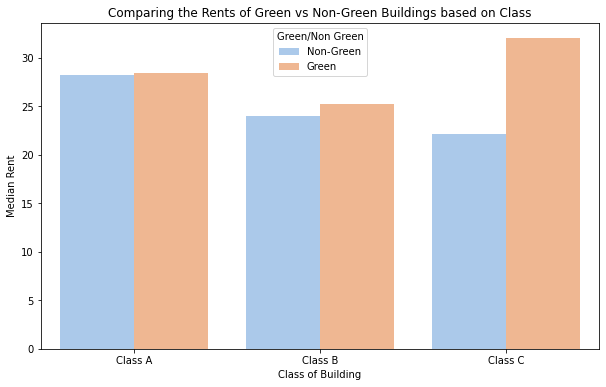

In [9]:
# Step 1: Group and summarize the data
class_groupby = gb_clean.groupby(['class', 'green_rating'])['Rent'].agg(['median','mean']).reset_index()
class_groupby

# Step 2: Create the grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='median', hue='green_rating',
            data=class_groupby, palette='pastel', ci=None)
plt.xlabel('Class of Building')
plt.ylabel('Median Rent')
plt.title('Comparing the Rents of Green vs Non-Green Buildings based on Class')
plt.legend(title='Green/Non Green', labels=['Non-Green', 'Green'])
plt.show()

Based on the graph, for green buildings, in the case of high quality structures, have slightly higher rent compared to non-green buildings. For low-quality buildings (Class C), green buildings will have relatively large premium in the rent.

Thus, understanding the quality of our future project is very important.

### Age

Newer buildings generally have higher rental rates compared to older ones. Due to the green building is a new concept, so the age might be another factor that impact the rent.

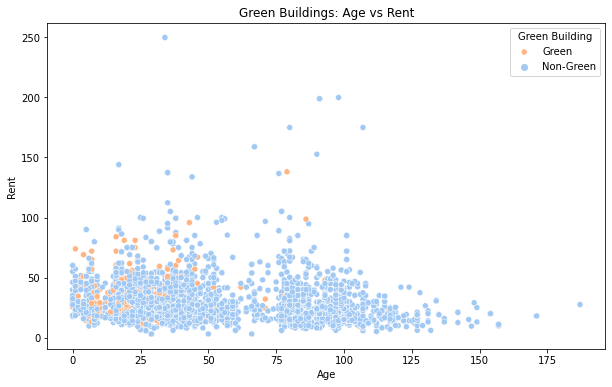

In [10]:
# Create the scatter plot of age and Rent for green and non green buildings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gb_clean, x='age', y='Rent', hue='green_rating', palette='pastel')
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Green Buildings: Age vs Rent')
plt.legend(title='Green Building', labels=['Green', 'Non-Green'])
plt.show()

It seems that age does not have a high correlation with rent. And there are more non-green buildings compared to green buildings after 50 years of age. But let's have a closer look at the age and rent between green and non-green.

C:\Users\ARSENE~1\AppData\Local\Temp/ipykernel_8596/3014227358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_clean['agebins'] = pd.cut(gb_clean['age'], bins=age_bins)


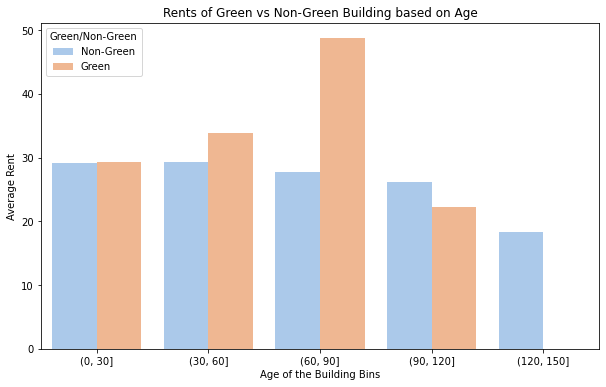

In [11]:
# Create the age bins using pandas
age_bins = [0, 30, 60, 90, 120, 150]
gb_clean['agebins'] = pd.cut(gb_clean['age'], bins=age_bins)

# Group and summarize the data using pandas
agebins_groupby = gb_clean.groupby(['agebins', 'green_rating']).agg(mean_rent=('Rent', 'mean'), n=('Rent', 'count')).reset_index()

# Create the grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='agebins', y='mean_rent', hue='green_rating', data=agebins_groupby, palette='pastel', ci=None)
plt.xlabel('Age of the Building Bins')
plt.ylabel('Average Rent')
plt.title('Rents of Green vs Non-Green Building based on Age')
plt.legend(title='Green/Non-Green', labels=['Non-Green', 'Green'])
plt.show()

Based on the chart, younger buildings show a similar rent for both types of the buildings, but as the building's age increases, green buildings tend to have higher rental rates. We can suggest that in for the new project, the rent won't be so different in terms of the green and non-green buildings.

### Amenities

The guru's analysis overlooked the influence of amenities on the premium of green houses compared to non-green houses. Green houses with amenities may exhibit a different premium than those without amenities. 

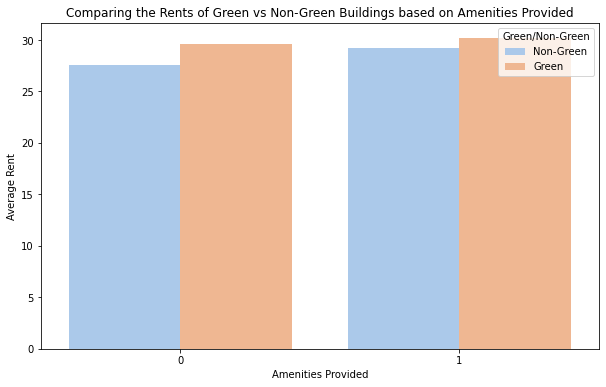

In [12]:
amenities_groupby = gb_clean.groupby(['amenities', 'green_rating']).agg(mean_rent=('Rent', 'mean'), n=('Rent', 'count')).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='amenities', y='mean_rent', hue='green_rating', data=amenities_groupby, palette='pastel', ci=None)
plt.xlabel('Amenities Provided')
plt.ylabel('Average Rent')
plt.title('Comparing the Rents of Green vs Non-Green Buildings based on Amenities Provided')
plt.legend(title='Green/Non-Green', labels=['Non-Green', 'Green'])
plt.show()

Based on the chart above, it appears that when amenities are provided, both green and non-green buildings will receive almost the same rent. The presence of amenities seems that it will decrease the rent difference between the two types of buildings.

### Clusters

The guru's analysis overlooks the impact of the neighborhood on the premium of green houses over non-green houses.
To simplify the analysis and reduce the number of clusters, we grouped them based on the 'cluster_rent' column, which can serve as a proxy for the neighborhood. This column reflects the rent of the cluster, which is influenced by the geographical location.

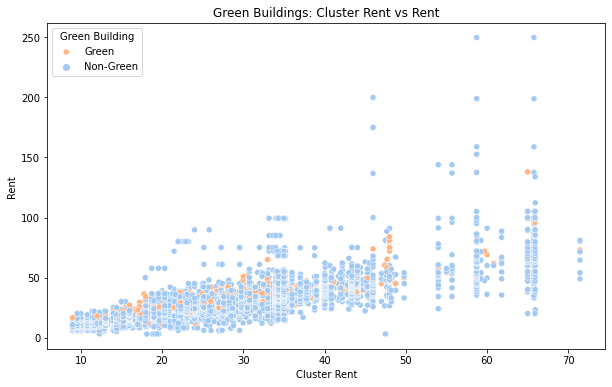

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gb_clean, x='cluster_rent', y='Rent',
                hue='green_rating', palette='pastel')
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Green Buildings: Cluster Rent vs Rent')
plt.legend(title='Green Building', labels=['Green', 'Non-Green'])
plt.show()

Rent is correlated with the cluster rent, as we expected.

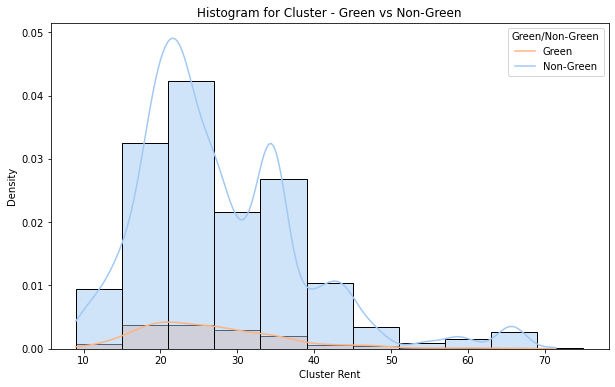

In [14]:
# Graph a histplot of distributions of green and non-green building 
plt.figure(figsize=(10, 6))
sns.histplot(data=gb_clean, x='cluster_rent', hue='green_rating',
             binwidth=6, kde=True, palette='pastel', alpha=0.5, stat='density')
plt.xlabel('Cluster Rent')
plt.ylabel('Density')
plt.title('Histogram for Cluster - Green vs Non-Green')
plt.legend(title='Green/Non-Green',labels=['Green', 'Non-Green'])
plt.show()

We can see that the skew of the green and non-green building are almost the same, indicating that most of the data points concentrate around 15-25 of cluster rent. Now let's group by the two types of buildings based on cluster rent.

C:\Users\ARSENE~1\AppData\Local\Temp/ipykernel_8596/1144315568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_clean['cluster_bins'] = pd.cut(gb_clean['cluster_rent'], bins=[


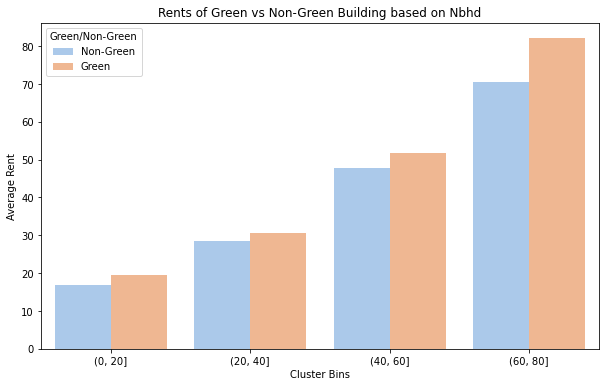

In [15]:
# Create the 'cluster_bins' column using cut function
gb_clean['cluster_bins'] = pd.cut(gb_clean['cluster_rent'], bins=[
                               0, 20, 40, 60, 80])

# Group and summarize the data using pandas
cluster_bins_groupby = gb_clean.groupby(['cluster_bins', 'green_rating']).agg(
    mean_rent=('Rent', 'mean')).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster_bins', y='mean_rent', hue='green_rating',
            data=cluster_bins_groupby, palette='pastel', ci=None)
plt.xlabel('Cluster Bins')
plt.ylabel('Average Rent')
plt.title('Rents of Green vs Non-Green Building based on Nbhd')
plt.legend(title='Green/Non-Green', labels=['Non-Green', 'Green'])
plt.show()

Based on the chart above, the premium for Green buildings over Non-green buildings vary based on the neighborhood they are located in. But green building will always have some premium.

### Number of Stories

The number of stories in a building may also have a significant impact on rental rates and should be considered in the analysis. Buildings with different numbers of stories may offer different amenities, views, and living experiences, which can influence the overall demand and rental prices.

C:\Users\ARSENE~1\AppData\Local\Temp/ipykernel_8596/2018001792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_clean['story_bins'] = pd.cut(gb_clean['stories'], bins=[


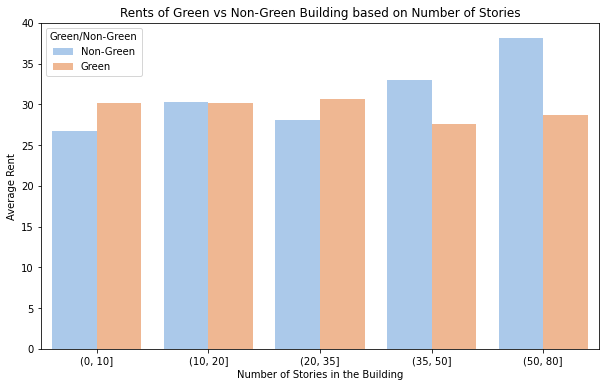

In [16]:
# Create the 'story_bins' column using pandas cut function
gb_clean['story_bins'] = pd.cut(gb_clean['stories'], bins=[
                                0, 10, 20, 35, 50, 80])

# Step 2: Group and summarize the data using pandas
storybins_groupby = gb_clean.groupby(['story_bins', 'green_rating']).agg(
    mean_rent=('Rent', 'mean')).reset_index()

# Step 3: Create the grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='story_bins', y='mean_rent', hue='green_rating',
            data=storybins_groupby, palette='pastel', ci=None)
plt.xlabel('Number of Stories in the Building')
plt.ylabel('Average Rent')
plt.title('Rents of Green vs Non-Green Building based on Number of Stories')
plt.legend(title='Green/Non-Green', labels=['Non-Green', 'Green'])
plt.show()

The premium of green houses over non-green houses is not consistent across all bins (groups) based on the number of stories. Considering this inconsistency, it becomes evident that the we should have taken the number of stories into account during the analysis. 

## Conclusion

There are multiple factors that can influence the rent of a building, such as building quality (class),age and amenities. It appears that a significant portion of the difference in rent between green and non-green buildings is driven by the skewed age and class distribution of these two groups, indicating that the rental premium observed for green buildings may not be solely attributed to their environmentally friendly features but rather influenced by other factors.